##  Ridge and Lasso Regression with Plot

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Features & Target
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Ridge Regression ----
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_preds)

# ---- Lasso Regression ----
lasso = Lasso(alpha=0.1)  # Lasso might need smaller alpha
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)

print(f"Ridge MSE: {ridge_mse:.4f}")
print(f"Lasso MSE: {lasso_mse:.4f}")


Ridge MSE: 0.5558
Lasso MSE: 0.6135


## Plot Predicted vs Actual Values

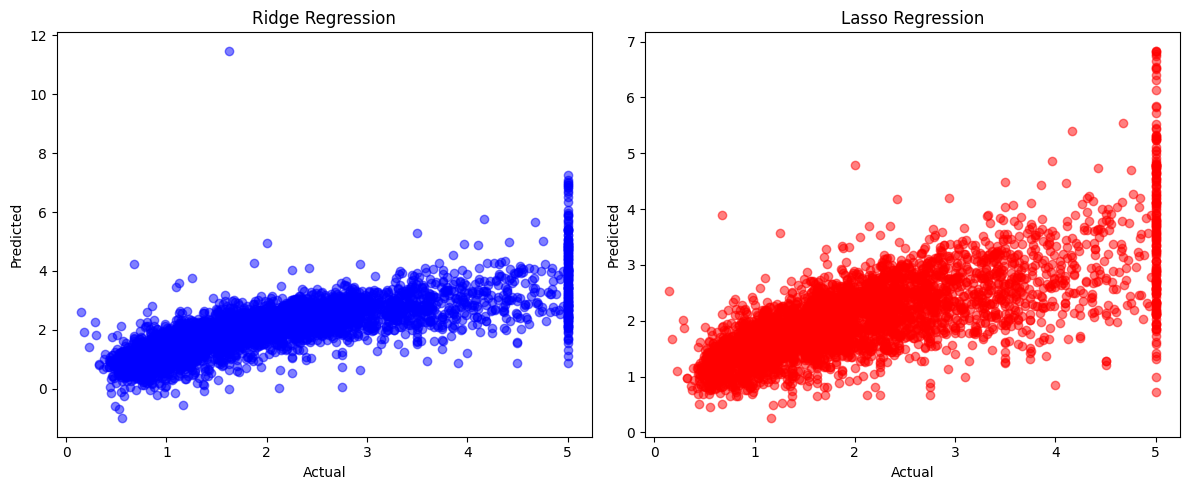

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Ridge Plot
plt.subplot(1,2,1)
plt.scatter(y_test, ridge_preds, color='blue', alpha=0.5)
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Lasso Plot
plt.subplot(1,2,2)
plt.scatter(y_test, lasso_preds, color='red', alpha=0.5)
plt.title('Lasso Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


 ## Best fit line for ONE feature vs target

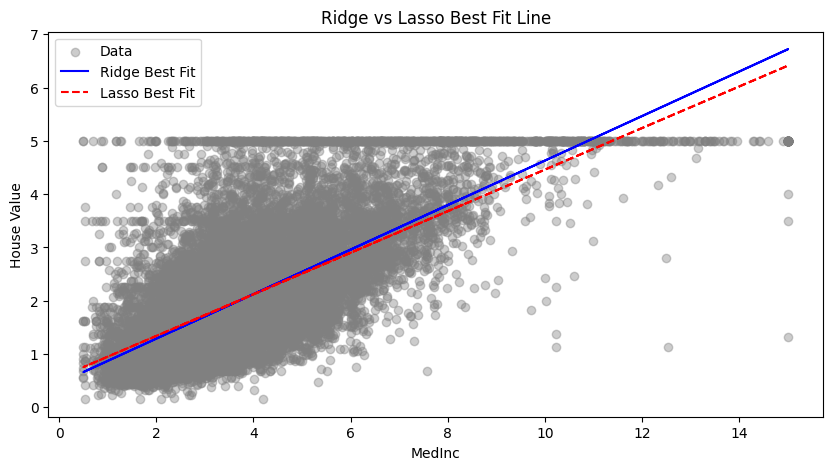

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, Lasso

# Load dataset
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

# Select only 'MedInc' feature for simplicity
X = df[['MedInc']].values
y = df['target'].values

# Fit Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
ridge_preds = ridge.predict(X)

# Fit Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_preds = lasso.predict(X)

# Plot Best Fit Lines
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='gray', alpha=0.4, label='Data')

# Ridge Line
plt.plot(X, ridge_preds, color='blue', label='Ridge Best Fit')

# Lasso Line
plt.plot(X, lasso_preds, color='red', linestyle='--', label='Lasso Best Fit')

plt.xlabel('MedInc')
plt.ylabel('House Value')
plt.title('Ridge vs Lasso Best Fit Line')
plt.legend()
plt.show()
